<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#QC-Thresholds" data-toc-modified-id="QC-Thresholds-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>QC Thresholds</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inputs</a></span></li><li><span><a href="#Load-expression-data" data-toc-modified-id="Load-expression-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load expression data</a></span></li><li><span><a href="#Load-QC-data" data-toc-modified-id="Load-QC-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Load QC data</a></span></li><li><span><a href="#Load-metadata" data-toc-modified-id="Load-metadata-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Load metadata</a></span></li><li><span><a href="#Remove-extra-sample-rows" data-toc-modified-id="Remove-extra-sample-rows-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Remove extra sample rows</a></span></li></ul></li><li><span><a href="#Check-statistics" data-toc-modified-id="Check-statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check statistics</a></span><ul class="toc-item"><li><span><a href="#FastQC-stats" data-toc-modified-id="FastQC-stats-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>FastQC stats</a></span></li><li><span><a href="#Number-of-aligned-reads" data-toc-modified-id="Number-of-aligned-reads-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Number of aligned reads</a></span></li></ul></li><li><span><a href="#Examine-Global-Correlations" data-toc-modified-id="Examine-Global-Correlations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine Global Correlations</a></span><ul class="toc-item"><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Metadata-Curation" data-toc-modified-id="Metadata-Curation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metadata Curation</a></span><ul class="toc-item"><li><span><a href="#BioProject-counts-of-passing-metadata" data-toc-modified-id="BioProject-counts-of-passing-metadata-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>BioProject counts of passing metadata</a></span></li><li><span><a href="#BioProject-counts-of-all-metadata" data-toc-modified-id="BioProject-counts-of-all-metadata-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>BioProject counts of all metadata</a></span></li></ul></li><li><span><a href="#Correlations-between-replicates" data-toc-modified-id="Correlations-between-replicates-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlations between replicates</a></span><ul class="toc-item"><li><span><a href="#Compute-Pearson-R-Score" data-toc-modified-id="Compute-Pearson-R-Score-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Compute Pearson R Score</a></span></li><li><span><a href="#Drop-Samples-with-no-replicates" data-toc-modified-id="Drop-Samples-with-no-replicates-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Drop Samples with no replicates</a></span></li><li><span><a href="#SL1344:-Removed-two-datasets-that-are-not-RNA-seq" data-toc-modified-id="SL1344:-Removed-two-datasets-that-are-not-RNA-seq-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>SL1344: Removed two datasets that are not RNA-seq</a></span></li><li><span><a href="#ST4/74:-Kept-samples-under-interesting-condition-but-no-replicates" data-toc-modified-id="ST4/74:-Kept-samples-under-interesting-condition-but-no-replicates-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>ST4/74: Kept samples under interesting condition but no replicates</a></span></li><li><span><a href="#D23580:-comparative-studies-are-kept" data-toc-modified-id="D23580:-comparative-studies-are-kept-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>D23580: comparative studies are kept</a></span></li><li><span><a href="#14028S:-Time-series-dataset-(PRJNA280002)-was-kept" data-toc-modified-id="14028S:-Time-series-dataset-(PRJNA280002)-was-kept-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>14028S: Time series dataset (PRJNA280002) was kept</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Final-statistics" data-toc-modified-id="Final-statistics-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Final statistics</a></span></li><li><span><a href="#Save-final-datasets" data-toc-modified-id="Save-final-datasets-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Save final datasets</a></span></li></ul></div>

<font size="4">This is a template notebook for performing preliminary quality control on your organism's expression data.</font>

In [1]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('ticks')

# Setup

## QC Thresholds

In [3]:
#min_pct_aligned = 40 # Minimum percent of reads aligned to genome
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

## Inputs

<font size="4">Enter organism name here</font>

In [4]:
#list of organisms: 
# LT2 :stm
# UK-1:sej
# D23580:sev
# SL1344:sey
# ST4/74:seb
# 14028S:seo

# Enteritidis :set
# heidelberg_41578: seeh

In [5]:
organism='LT2'

<font size="4">Show files in the organism directory</font>

In [6]:
data_dir = path.join('../data/',organism) + '/raw_data'
os.listdir(data_dir)

['log_tpm.csv',
 'multiqc_report.html',
 'Salmonella_enterica_LT2.tsv',
 'multiqc_stats.tsv']

In [7]:
#os.getcwd()

<font size="4">Enter name of curated metadata file here</font>

In [8]:
metadata_file = 'Salmonella_enterica_' + organism + '.tsv'

## Load expression data

In [9]:
DF_log_tpm = pd.read_csv(path.join(data_dir,'log_tpm.csv'),index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 4554
Number of samples: 113


In [10]:
#DF_log_tpm.fillna(0,inplace=True)
DF_log_tpm.head()

,ERX1409468,ERX1409469,ERX1409470,ERX1409471,ERX1409472,ERX1409473,ERX1409474,ERX1409475,ERX1409476,ERX1409477,...,SRX4341766,SRX4341767,SRX4341768,SRX4341769,SRX8914620,SRX8914621,SRX8914622,SRX8914623,SRX8914624,SRX8914625
Geneid,,,,,,,,,,,,,,,,,,,,,
PSLT001,8.244522,7.550140,8.191478,7.992268,7.526902,7.542992,7.717490,8.132286,7.923764,7.427443,...,6.393467,6.125093,6.347966,6.210854,4.330629,4.053761,4.336823,3.538775,4.363411,4.098365
PSLT002,7.767262,7.620667,8.108566,6.943723,6.122707,5.919670,6.930891,6.694182,7.162785,7.248391,...,4.968088,4.812163,4.778848,5.042502,4.305828,4.268186,4.359980,4.483070,4.377455,4.285936
PSLT003,9.457923,9.733397,9.517092,9.127689,9.240059,9.091436,10.038774,9.874871,10.128699,9.515133,...,10.287554,9.520894,9.345060,9.328639,8.470629,8.819859,8.595183,9.270612,8.206862,8.279569
PSLT004,8.827210,8.883315,8.636932,7.208681,5.186569,6.760904,7.195831,7.860234,7.140376,8.634975,...,6.318958,6.892671,6.592245,7.412044,7.676357,7.908094,7.742047,8.597085,7.652825,8.095490
PSLT005,8.610369,8.541247,6.979961,8.859117,8.392773,8.408902,7.849339,8.194131,6.221725,8.293061,...,8.128636,7.688094,7.435332,7.604691,8.469687,8.357033,8.440246,8.297336,8.331200,7.851712


## Load QC data
<font size="4">There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.</font>

In [11]:
DF_qc_stats = pd.read_csv(path.join(data_dir,'multiqc_stats.tsv'),index_col=0, sep='\t')
print('Number of samples with QC data:',DF_qc_stats.shape[0])

Number of samples with QC data: 113


In [12]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats.head()

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
ERX1409468,6335391,170448,5667861,458589,0,0,0,0,6220,0,...,6423471,648770571,76671518,569364929,12.239403,0.3362,0.3147,0.3491,0.0,0.0
ERX1409469,6688885,178878,5969930,500076,0,0,0,0,6680,0,...,6778708,684649508,78997273,602645918,11.977455,0.3286,0.3347,0.3366,0.0,0.0
ERX1409470,6635037,176976,5899342,518784,0,0,0,0,6506,0,...,6741700,680911700,91553896,585910798,13.952015,0.3258,0.3260,0.3482,0.0,0.0
ERX1409471,6788963,174774,6087024,481709,0,0,0,0,5179,0,...,6886827,695569527,85633861,607218072,12.702031,0.2814,0.2928,0.4258,0.0,0.0
ERX1409472,7107019,181728,6358572,519293,0,0,0,0,5431,0,...,7204779,727682679,94843134,629251440,13.526671,0.2899,0.2847,0.4254,0.0,0.0


## Load metadata

In [13]:
DF_metadata = pd.read_csv(path.join(data_dir,metadata_file),index_col=0,sep='\t')
print('Number of samples with metadata:',DF_metadata.shape[0])
s = DF_metadata.shape[0]

Number of samples with metadata: 115


## Remove extra sample rows

In [14]:
len(set(DF_log_tpm.columns))

113

In [15]:
# Ensure that metadata and qc_stats data contain all log_tpm sample information
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [16]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

In [17]:
DF_metadata.shape

(113, 55)

# Check statistics

<font size="4">From here, create a new spreadsheet where you can flag samples based on various QC statistics</font>


## FastQC stats

In [18]:
fastqc_cols = ['per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

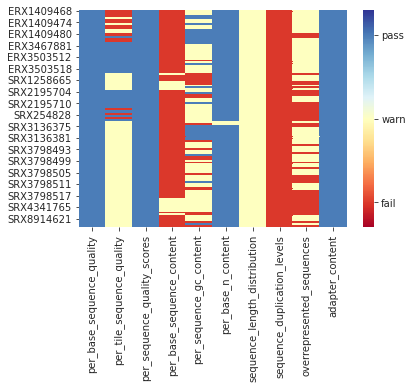

In [19]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

<font size="4">The following four categories are the most important:
    - per_base_sequence_quality
    - per_sequence_quality_scores
    - per_base_n_content
    - adapter_content
    
If a sample does not pass any of these four categories, discard the sample
</font>

In [20]:
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [21]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] != 'pass').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
SRX2598260,pass,pass,warn,pass
SRX2598262,pass,pass,warn,pass


<font size="4">Mark samples as failed.</font>

In [22]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

## Number of aligned reads

<font size="4">The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.</font>

In [23]:
min_mrna_reads

500000.0

Text(0.5, 1.0, 'Number of reads mapped to CDS')

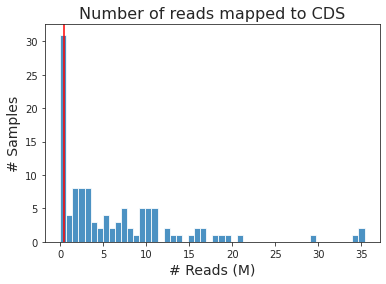

In [24]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

<font size="4">Identify samples with poor read depth:</font>

In [25]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
DF_failed_mrna

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
SRX3798516,17252607,18589,16387466,723286,0,0,0,0,44535,0,...,17289535,1377778820,2493376,1366655029,0.807371,0.1952,0.4623,0.3425,0.0000,0.0000
SRX3798515,21103150,31480,20032692,969018,0,0,0,0,63893,0,...,21157887,1686303543,3050447,1672418669,0.823391,0.2413,0.4000,0.3587,0.0000,0.0000
SRX3798494,26423598,36036,1854109,24514204,0,0,0,0,772,0,...,26655808,1999185600,19948773,1963082775,1.805877,0.1353,0.4523,0.4125,0.0000,0.0000
SRX3798496,30700762,71749,12610613,17813732,0,0,0,0,4571,0,...,30836535,2312740125,10221345,2279380719,1.442419,0.1505,0.4003,0.4493,0.0000,0.0000
SRX3798514,22917011,81529,21549643,1165395,0,0,0,0,106363,0,...,23002553,1833404770,3942984,1817786236,0.851887,0.2987,0.3606,0.3407,0.0000,0.0000
ERX1409484,10727477,107787,10473832,101776,0,0,0,0,0,0,...,15107140,543857040,155263390,384104906,29.373920,0.0000,0.0000,0.4790,0.2792,0.2418
ERX1409485,10893940,109151,10642876,97513,0,0,0,0,0,0,...,14826383,533749788,138948396,390287599,26.878173,0.0000,0.0000,0.4679,0.2946,0.2375
ERX1409483,10937078,109436,10682230,101033,0,0,0,0,0,0,...,14594950,525418200,129867904,391016658,25.579917,0.0000,0.0000,0.4832,0.2815,0.2353
SRX3798513,23452423,117531,13745078,9352269,0,0,0,0,24844,0,...,23526794,1870221219,12150738,1847346137,1.223122,0.1630,0.4316,0.4054,0.0000,0.0000
ERX1409481,10097108,118435,9842072,95685,0,0,0,0,0,0,...,14021382,504769752,138932650,361637563,28.355936,0.0000,0.0000,0.4348,0.3002,0.2651


<font size="4">Mark samples as failed.</font>

In [26]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

# Examine Global Correlations

## Hierarchical Clustering

<font size=4> A clustermap is a great way to visualize the global correlations between one sample and all others. The following code uses hierarchical clustering to identify specific clusters in the clustermap <font size=4>
    
<font size=4> To increase the number of clusters, decrease the value of `thresh`. To decrease the number of clusters, increase the value of `thresh` <font size=4>

In [27]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .3

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  6


<font size="4">To view sample IDs in the clustermap, set `xticklabels` and `yticklabels` to `True`. You can increase the `size` variable to improve readability of sample IDs<font>

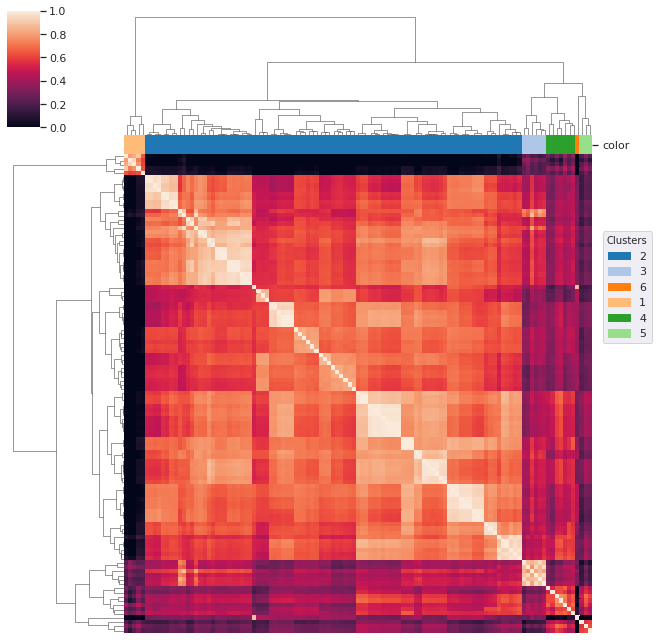

In [28]:
size = 9

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False,vmin=0,vmax=1)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

<font size="4">Select clusters to remove.</font>

In [29]:
#indicate which clusters you want to remove

# LT2: clusters 1,6
# UK-1: None
# D23580: cluster 6
# SL1344: clusters 1,2,3
# ST4/74: clusters 4,5,6
# 14028S: clusters 1,2

remove_clst = [1,6]
failed_global_corr = clst[clst.cluster.isin(remove_clst)].index

In [30]:
DF_metadata['passed_global_correlation'] = ~DF_metadata.index.isin(failed_global_corr)

In [31]:
len(failed_global_corr)

6

In [32]:
np.unique(DF_metadata.loc[failed_global_corr].BioProject)

array(['PRJNA377210', 'PRJNA438234'], dtype=object)

# Remove failed samples

In [33]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_global_correlation']

In [34]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

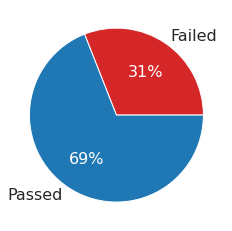

In [35]:
_,_,pcts = plt.pie(pass_qc.value_counts().sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

In [36]:
DF_metadata_passed.shape

(78, 58)

# Metadata Curation

<font size=4>The following sections can only be run after metadata curation is complete. To enable metadata curation, the code in this section sorts data by BioProject. </font>

## BioProject counts of passing metadata

In [37]:
DF_metadata_passed.BioProject.value_counts().sort_values(ascending=False)

PRJNA438234    15
PRJNA479732     9
PRJNA296349     9
PRJEB34015      9
PRJNA344783     8
PRJNA400327     8
PRJNA194147     8
PRJNA656165     6
PRJEB33612      6
Name: BioProject, dtype: int64

## BioProject counts of all metadata

In [38]:
#DF_metadata.BioProject.value_counts().sort_values(ascending=False)

# Correlations between replicates

<font size=4> First, get a full sample name </font>

In [39]:
# Turn off pesky warning
pd.set_option('mode.chained_assignment', None)

In [40]:
DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project_name'].str.cat(DF_metadata_passed.loc[:,'condition_name'],sep=':')

## Compute Pearson R Score

<font size="4">Once you have updated your metadata files with the sample information, we can investigate correlations between biological replicates. We require biological replicates to have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it will be dropped. </font>

In [41]:
from tqdm.notebook import tqdm
import itertools
from scipy import stats
import numpy as np

In [42]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

In [43]:
sns.set_style('ticks')

Median Pearson R between replicates: 0.99


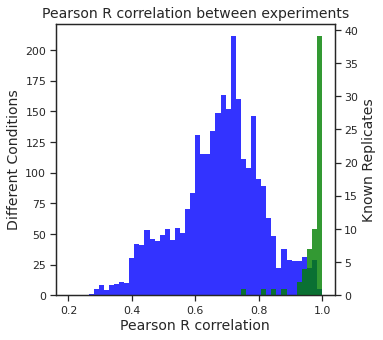

In [44]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [45]:
#pearson r cutoff for replicates
rcutoff = 0.95

#for each sample get max correlation between replicates
dissimilar = []
for idx, grp in DF_metadata_passed.groupby('full_name'):
    ident = np.identity(len(grp))
    corrs = (DF_log_tpm[grp.index].corr() - ident).max()
    dissimilar.extend(corrs[corrs<rcutoff].index)
#DF_metadata['passed_replicate_corr'] = ~DF_metadata.index.isin(dissimilar)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar)

In [46]:
len(dissimilar)

17

## Drop Samples with no replicates

In [47]:
cond_counts = DF_metadata_passed.full_name.value_counts()
drop_conds = cond_counts[cond_counts < 2].index
drop_conds

Index(['Rockhopper:sgrs_treated', 'Rockhopper:sgrs_sgrt',
       'Rockhopper:WT_treated', 'nusG:del_nusG_OD05',
       'Rockhopper:deltasgrs_treated', 'Rockhopper:deltasgrs',
       'Rockhopper:sgrs_sgrt_treated', 'nusG:WT_OD05', 'Rockhopper:WT',
       'Rockhopper:sgrs'],
      dtype='object')

In [48]:
DF_metadata_passed['passed_number_replicates'] = ~DF_metadata_passed.condition_name.isin(drop_conds)

In [49]:
DF_metadata_passed = DF_metadata_passed[DF_metadata_passed['passed_number_replicates']]

## SL1344: Removed two datasets that are not RNA-seq

In [50]:
# #SL1344: drop these projects
# #PRJNA322828: not RNA seq
# DF_metadata_passed = DF_metadata_passed[DF_metadata_passed.BioProject !='PRJNA322828']


# #PRJNA266347: GRAD seq has different assumptions as RNA seq
# DF_metadata_passed = DF_metadata_passed[DF_metadata_passed.BioProject !='PRJNA266347']

## ST4/74: Kept samples under interesting condition but no replicates

In [51]:
# #ST4/74
# jh_projects = ['PRJNA215033','PRJNA315446','PRJNA490148']

In [52]:
# #Samples that failed replicate correlations
# failed_rep = (set(dissimilar)-set(DF_metadata_passed[DF_metadata_passed.full_name.isin(drop_conds)].index))
# # failed_rep

In [53]:
# jh1_idx = DF_metadata_passed[DF_metadata_passed.BioProject=='PRJNA215033'].index
# jh2_idx = DF_metadata_passed[DF_metadata_passed.BioProject=='PRJNA315446'].index
# jh3_idx = DF_metadata_passed[DF_metadata_passed.BioProject=='PRJNA490148'].index
# drop = set(dissimilar)-set(jh1_idx)-set(jh2_idx)-set(jh3_idx)-set(failed_rep)

In [54]:
# rcutoff = 0.8

# jh1_df = DF_log_tpm[jh1_idx]
# corrs_1=(jh1_df.corr()-np.identity(jh1_df.shape[1])).max()
# jh1_drop = corrs_1[corrs_1<rcutoff]
# print('PRJNA215033:\n',jh1_drop)

# jh2_df = DF_log_tpm[jh2_idx]
# corrs_2=(jh2_df.corr()-np.identity(jh2_df.shape[1])).max()
# jh2_drop = corrs_2[corrs_2<rcutoff]
# print('PRJNA315446:\n',jh2_drop)

# jh3_df = DF_log_tpm[jh3_idx]
# corrs_3=(jh3_df.corr()-np.identity(jh3_df.shape[1])).max()
# jh3_drop = corrs_3[corrs_3<rcutoff]
# print('PRJNA490148:\n',jh3_drop)

In [55]:
# total_drop_index=list(failed_rep) + list(drop) + list(jh1_drop.index) + list(jh2_drop.index) + list(jh3_drop.index)
# # total_drop_index

In [56]:
# keep = set(DF_metadata_passed.index)-set(total_drop_index)
# DF_metadata_final = DF_metadata_passed.loc[keep]

In [57]:
# DF_metadata_final.shape

## D23580: comparative studies are kept

In [58]:
# PRJNA422455, PRJNA490148

In [59]:
# #Samples that failed replicate correlations
# failed_rep = (set(dissimilar)-set(DF_metadata_passed[DF_metadata_passed.full_name.isin(drop_conds)].index))
# failed_rep

In [60]:
# jh1_idx = DF_metadata_passed[DF_metadata_passed.BioProject=='PRJNA422455'].index
# jh2_idx = DF_metadata_passed[DF_metadata_passed.BioProject=='PRJNA490148'].index
# drop = set(dissimilar)-set(jh1_idx)-set(jh2_idx)-set(failed_rep)

In [61]:
# rcutoff = 0.8

# jh1_df = DF_log_tpm[jh1_idx]
# corrs_1=(jh1_df.corr()-np.identity(jh1_df.shape[1])).max()
# jh1_drop = corrs_1[corrs_1<rcutoff]
# print('PRJNA422455:\n',jh1_drop)

# jh2_df = DF_log_tpm[jh2_idx]
# corrs_2=(jh2_df.corr()-np.identity(jh2_df.shape[1])).max()
# jh2_drop = corrs_2[corrs_2<rcutoff]
# print('PRJNA490148:\n',jh2_drop)

In [62]:
# total_drop_index=list(failed_rep) + list(drop) + list(jh1_drop.index) + list(jh2_drop.index)
# total_drop_index

In [63]:
# keep = set(DF_metadata_passed.index)-set(total_drop_index)
# DF_metadata_final = DF_metadata_passed.loc[keep]

In [64]:
# DF_metadata_final.shape

## 14028S: Time series dataset (PRJNA280002) was kept

In [65]:
# #Samples that failed replicate correlations
# failed_rep = (set(dissimilar)-set(DF_metadata_passed[DF_metadata_passed.full_name.isin(drop_conds)].index))
# len(failed_rep)

In [66]:
# timeseries = DF_metadata_passed[DF_metadata_passed.BioProject=='PRJNA280002'].index
# drop = set(dissimilar)-set(timeseries)-set(failed_rep)

In [67]:
# rcutoff = 0.8

# timeseries_df = DF_log_tpm[timeseries]
# corrs_t=(timeseries_df.corr()-np.identity(timeseries_df.shape[1])).max()
# timeseries_drop = corrs_t[corrs_t<rcutoff]
# print('timeseries:\n',timeseries_drop)

In [68]:
# total_drop_index=list(failed_rep) + list(drop) + list(timeseries_drop.index)
# total_drop_index

In [69]:
# keep = set(DF_metadata_passed.index)-set(total_drop_index)
# DF_metadata_final = DF_metadata_passed.loc[keep]

In [70]:
# DF_metadata_final.shape

# Remove failed samples

In [71]:
qc_columns = ['passed_number_replicates','passed_similar_replicates']

In [72]:
DF_metadata_final = DF_metadata_passed[DF_metadata_passed[qc_columns].all(axis=1)]

In [73]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

In [74]:
DF_metadata_final.shape

(61, 61)

# Final statistics

In [75]:
qc_columns = ['passed_number_replicates','passed_similar_replicates']

In [76]:
a = DF_metadata_passed[qc_columns].all(axis=1)

In [77]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_global_correlation']

In [78]:
b = DF_metadata[qc_columns].all(axis=1)
pass_qc = a&b

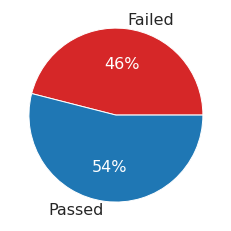

In [79]:
_,_,pcts = plt.pie(pass_qc.value_counts().sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

In [80]:
print(organism,':')
print('Original number of samples in metadata:',s)
print('Samples with no expression data:',s-DF_log_tpm.shape[1])
print('Number of samples that failed fastqc:',DF_failed_fastqc.shape[0])
#print('Number of samples that failed mapping:',DF_failed_mapping.shape[0])
print('Number of samples that failed mrna:',DF_failed_mrna.shape[0])
print('Number of samples that failed global correlation:',len(failed_global_corr))
print('Number of samples that failed replicates correlation:',len(dissimilar)-len(drop_conds))
print('Number of samples with no replicates:',len(drop_conds))
print('Number of samples after QC:',DF_metadata_final.shape[0])
#print('Number of samples droped within the Jay Hinton datasets (corr<0.8):',1)
#print('Number of samples droped within the timeseries dataset (corr<0.8):',0)

LT2 :
Original number of samples in metadata: 115
Samples with no expression data: 2
Number of samples that failed fastqc: 2
Number of samples that failed mrna: 30
Number of samples that failed global correlation: 6
Number of samples that failed replicates correlation: 7
Number of samples with no replicates: 10
Number of samples after QC: 61


# Save final datasets

In [81]:
# DF_log_tpm_final.to_csv(path.join('../data/',organism) + '/interim/'+'log_tpm_qc.csv')
# DF_metadata_final.to_csv(path.join('../data/',organism) + '/interim/'+'metadata_qc.csv'))